# House Price Prediction Regression Project

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

In [2]:
# Loading the data from csv file to pandas dataframe
house_price = pd.read_csv('house_data.csv')

# Inspecting the first 5 rows of the dataframe
house_price.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Checking the number of rows and columns
house_price.shape

(4600, 18)

### Data Cleaning and Preprocessing

In [4]:
# Getting some information about the dataset
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
# Getting statistical data of the dataset
house_price.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
# Checking for duplicate values
house_price.drop_duplicates()
house_price.shape

(4600, 18)

we don't have any duplicate values

In [7]:
# Finding the number of 0's in columns
cols = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'sqft_above',
        'yr_built', 'street', 'city','statezip', 'country']

for col in cols:
    value_0 = (house_price[col] == 0).sum()
    print(col,':',value_0)

date : 0
price : 49
bedrooms : 2
bathrooms : 2
sqft_living : 0
sqft_lot : 0
floors : 0
sqft_above : 0
yr_built : 0
street : 0
city : 0
statezip : 0
country : 0


In [8]:
# Droping zeros value of price column
house_price = house_price[~(house_price['price']==0)]

In [9]:
# Droping values having less than 1 of bedrooms column
house_price = house_price[~(house_price['bedrooms']<1)]

In [10]:
# Droping zeros value of bathrooms column
house_price = house_price[~(house_price['bathrooms']==0)]

In [11]:
# checking the number of 0's in columns
cols = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'sqft_above',
        'yr_built', 'street', 'city','statezip', 'country']

for col in cols:
    value_0 = (house_price[col] == 0).sum()
    print(col,':',value_0)

date : 0
price : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
sqft_above : 0
yr_built : 0
street : 0
city : 0
statezip : 0
country : 0


Now, we got the columns which don't have any zero values

### Handling Missing Values

In [12]:
house_price.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

we don't have any missing values

### Handling Outliers

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

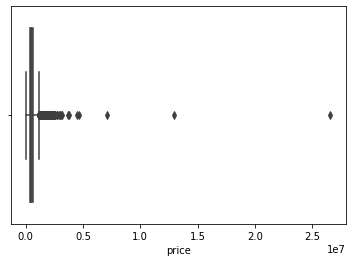

In [13]:
sns.boxplot(house_price['price'])

In [14]:
# Droping the Outliers of price column.
house_price = house_price[~(house_price['price']>8000000)]
house_price.shape

(4547, 18)

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

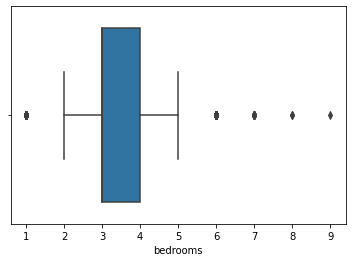

In [15]:
sns.boxplot(house_price['bedrooms'])

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

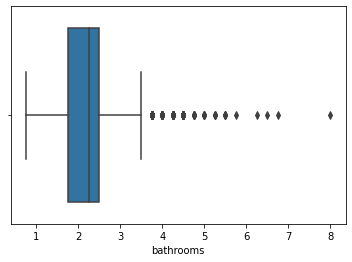

In [16]:
sns.boxplot(house_price['bathrooms'])

In [17]:
# Droping the Outliers of bathrooms column 
house_price = house_price[~(house_price['bathrooms']>7)]
house_price.shape

(4546, 18)

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

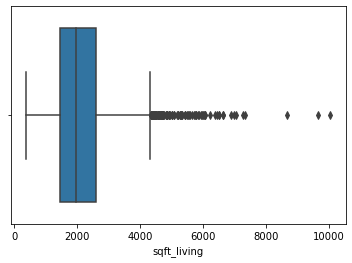

In [18]:
sns.boxplot(house_price['sqft_living'])

In [19]:
# Droping the Outliers of sqft_living column 
house_price = house_price[~(house_price['sqft_living']>8000)]
house_price.shape

(4543, 18)

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot'>

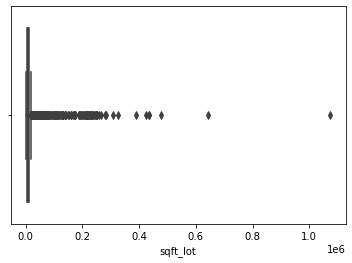

In [20]:
sns.boxplot(house_price['sqft_lot'])

In [21]:
# Droping the Outliers of sqft_lot column 
house_price = house_price[~(house_price['sqft_lot']>600000)]
house_price.shape

(4541, 18)

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors'>

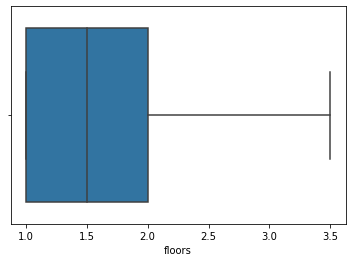

In [22]:
sns.boxplot(house_price['floors'])

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above'>

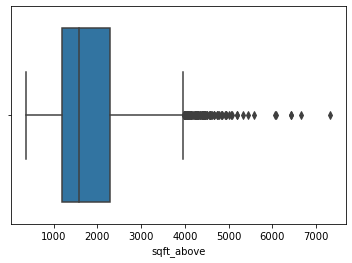

In [23]:
sns.boxplot(house_price['sqft_above'])

In [24]:
# Droping the Outliers of sqft_above column 
house_price = house_price[~(house_price['sqft_above']>7000)]
house_price.shape

(4540, 18)

c:\Users\SEQBAL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement'>

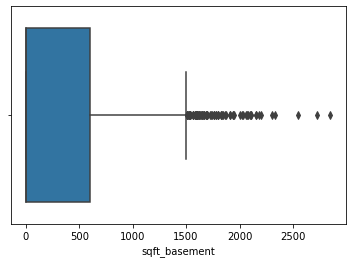

In [25]:
sns.boxplot(house_price['sqft_basement'])

In [26]:
# Droping the Outliers of sqft_basement column 
house_price = house_price[~(house_price['sqft_basement']>4000)]
house_price.shape

(4540, 18)

### Handling Categorical Values

In [27]:
categorical = house_price.dtypes[house_price.dtypes == 'object'].index
print(categorical)

house_price[categorical].describe()

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')


,date,street,city,statezip,country
count,4540,4540,4540,4540,4540
unique,70,4465,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,140,4,1558,148,4540


In [28]:
# According to analysis, we don't need of year, street and country columns. So, droping them
house_price.drop(['date','street','country'], axis=1, inplace=True)

In [29]:
house_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


### Feature Selection and Engineering

<AxesSubplot:>

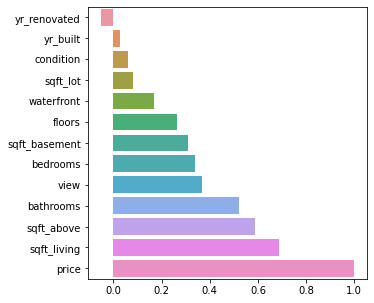

In [30]:
plt.figure(figsize=(5,5))
corr_feat_series = pd.Series.sort_values(house_price.corrwith(house_price.price))
sns.barplot(x = corr_feat_series, y =corr_feat_series.index, orient ='h')

In [31]:
# According to analysis, 'yr_built' and 'yr_renovated' have less correlation with price column. So, droping them
house_price.drop(['yr_built','yr_renovated'], axis=1, inplace=True)

In [32]:
house_price['city'].value_counts()

Seattle                1558
Renton                  290
Bellevue                280
Redmond                 233
Kirkland                187
Issaquah                185
Kent                    183
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            81
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   28
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific             

In [33]:
house_price['city'] = house_price['city'].apply(lambda x: x.strip())
len(house_price['city'])

4540

In [34]:
city_count = house_price['city'].value_counts()

In [35]:
city_count_less_150 = city_count[city_count < 150]

In [36]:
house_price['city'] = house_price['city'].apply(lambda x: 'Other' if x in city_count_less_150 else x)

In [37]:
house_price['city'].value_counts()

Seattle      1558
Other        1278
Renton        290
Bellevue      280
Redmond       233
Kirkland      187
Issaquah      185
Kent          183
Auburn        175
Sammamish     171
Name: city, dtype: int64

In [38]:
# Treating 'statezip' column and extracting the numeric code only
house_price['statezip'] = house_price['statezip'].str.split().str[1]

In [39]:
# Applying Label encoding on independent variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

house_price['price'] = label_encoder.fit_transform(house_price['price'])
house_price['city'] = label_encoder.fit_transform(house_price['city'])
house_price['statezip'] = label_encoder.fit_transform(house_price['statezip'])

In [40]:
house_price['city'].value_counts()

9    1558
5    1278
7     290
1     280
6     233
4     187
2     185
3     183
0     175
8     171
Name: city, dtype: int64

In [41]:
# Getting some information about the dataset
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4540 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4540 non-null   int64  
 1   bedrooms       4540 non-null   float64
 2   bathrooms      4540 non-null   float64
 3   sqft_living    4540 non-null   int64  
 4   sqft_lot       4540 non-null   int64  
 5   floors         4540 non-null   float64
 6   waterfront     4540 non-null   int64  
 7   view           4540 non-null   int64  
 8   condition      4540 non-null   int64  
 9   sqft_above     4540 non-null   int64  
 10  sqft_basement  4540 non-null   int64  
 11  city           4540 non-null   int32  
 12  statezip       4540 non-null   int32  
dtypes: float64(3), int32(2), int64(8)
memory usage: 461.1 KB


Now, we got all the features in numerical format

### Splitting the dependent and independent features

In [42]:
X = house_price.drop(['price'],axis=1)
Y = house_price['price']
print(X,'\n',Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  city  statezip  
0 

### Splitting Training and Test data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",Y_train.shape)
print("y test: ",Y_test.shape)

x train:  (3178, 12)
x test:  (1362, 12)
y train:  (3178,)
y test:  (1362,)


### Feature Scaling 

In [44]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

X_train = msc.fit_transform(X_train)
X_test = msc.transform(X_test)

In [45]:
X_train[:2,:]

array([[0.42857143, 0.26315789, 0.21625767, 0.00337486, 0.        ,
        0.        , 0.5       , 0.75      , 0.07348243, 0.33333333,
        1.        , 0.61842105],
       [0.28571429, 0.21052632, 0.21319018, 0.0682215 , 0.        ,
        0.        , 0.        , 0.75      , 0.22204473, 0.        ,
        0.        , 0.59210526]])

In [46]:
X_test[:2,:]

array([[0.42857143, 0.42105263, 0.34355828, 0.01126557, 0.4       ,
        0.        , 0.        , 0.5       , 0.35782748, 0.        ,
        0.55555556, 0.35526316],
       [0.28571429, 0.21052632, 0.2208589 , 0.04539307, 0.        ,
        0.        , 0.        , 0.5       , 0.13897764, 0.2       ,
        0.66666667, 0.42105263]])

### Cross Validation

In [47]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [SVR(),LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]

In [48]:
# Cross-Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train, Y_train):
    cv = KFold(n_splits=4, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    score_list = cross_val_score(model, X_train, Y_train, cv = cv, scoring = r2)
    score = score_list.mean()
    return score

In [49]:
for model in models:
    print('Training Model: ', model)
    score = test_model(model, X_train, Y_train)
    print("Score of Models", score)
    print('\n')

Training Model:  SVR()
Score of Models 0.17798625922159764


Training Model:  LinearRegression()
Score of Models 0.5073547443864359


Training Model:  RandomForestRegressor()
Score of Models 0.7416847999606895


Training Model:  GradientBoostingRegressor()
Score of Models 0.7519504769073513




From the above analysis, we can conclude that GradientBoostingRegressor gives more best result out of four algorithms. So, choosing GradientBoostingRegressor for my final deployment.

### Model Training 

##### GradientBoostingRegressor

In [50]:
gb = GradientBoostingRegressor()
gb.fit(X_train,Y_train)

GradientBoostingRegressor()

### Prediction on Trained data

In [51]:
y_train_pred = gb.predict(X_train)

### Evaluating the Algorithm on Trained data

In [52]:
score_train = metrics.r2_score(Y_train,y_train_pred)
score_train

0.796303099663031

### Prediction on Test data

In [53]:
y_test_pred = gb.predict(X_test)

### Evaluating the Algorithm on Test data

In [54]:
score_test = metrics.r2_score(Y_test,y_test_pred)
score_test

0.7646431828175815

### Model Deployment 

In [55]:
import pickle 
pickle.dump(gb,open("model.pkl", 'wb'))